In [178]:
using LinearAlgebra
using Symbolics
using Latexify
using Makie
using CairoMakie

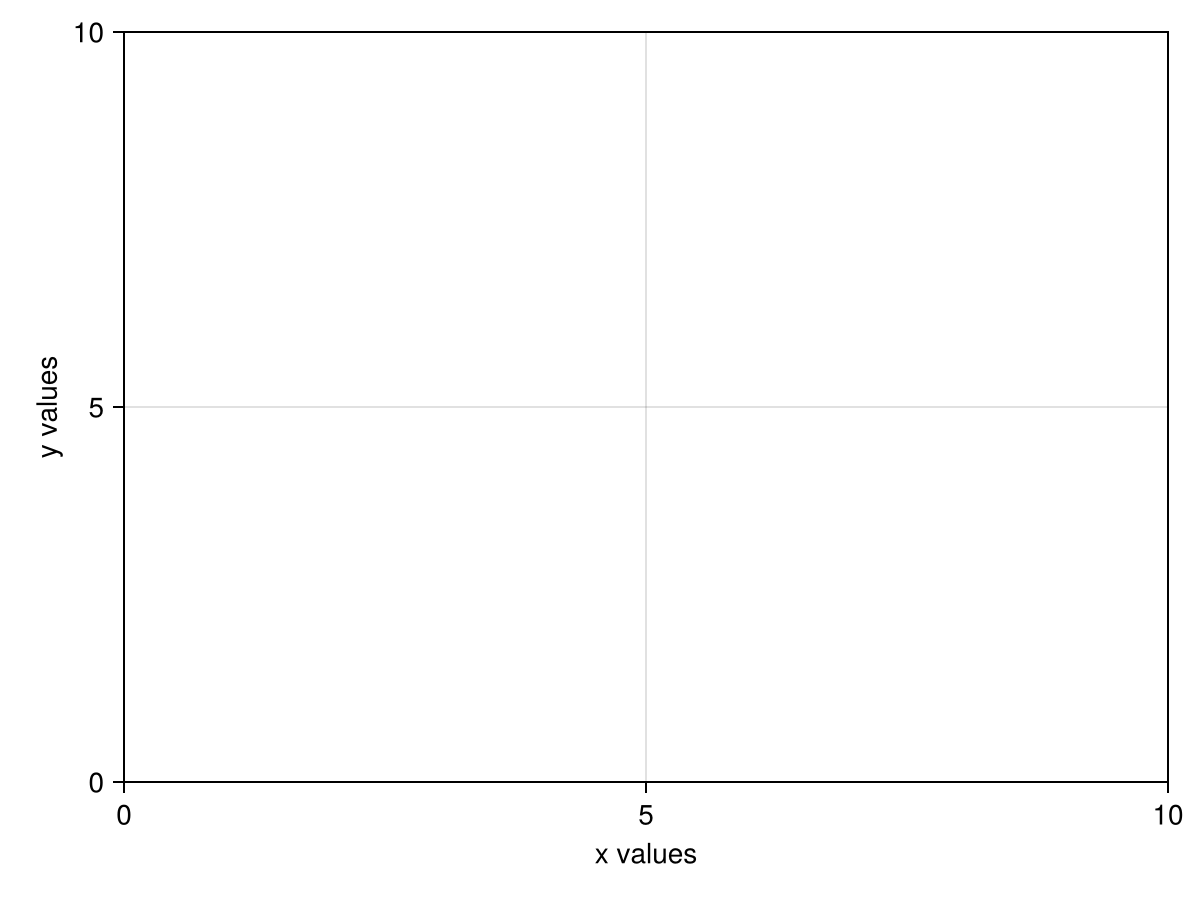

In [179]:

figure = Figure()

ax = Axis(figure[1, 1], xlabel = "x values", ylabel = "y values",
    )

figure

# Finding Limits

## Formulas and Properties of Limits:

**Slope**

In [180]:
@variables a b c m n x y C F P L K lim(..) f(x) g(x);

In [181]:
xs = Symbolics.variables(:x, 1:2);
ys = Symbolics.variables(:y, 1:2);

In [182]:
lim(b) ~ b

lim(b) ~ b

In [183]:
lim(b) ~ b ~ lim(x) ~ c ~ lim(x^n) ~ c^n

lim(b) ~ b ~ lim(x) ~ c ~ lim(x^n) ~ c^n

In [184]:
lim() ~ f ~ L

lim() ~ f(x) ~ L

In [185]:
lim() ~ g ~ K

lim() ~ g(x) ~ K

In [186]:
lim([f + g]) ~ L + K

lim(Num[g(x) + f(x)]) ~ K + L

In [187]:
lim([f - g]) ~ L - K

lim(Num[-g(x) + f(x)]) ~ -K + L

In [188]:
lim([b*f]) ~ b*L

lim(Num[b*f(x)]) ~ L*b

In [189]:
lim([f*g]) ~ L*K

lim(Num[g(x)*f(x)]) ~ K*L

In [190]:
lim(f // g) ~ L // K ~ K != 0

lim(f(x) / g(x)) ~ L / K ~ K != 0

In [191]:
y ~ x // sqrt(x  + 1 - 1)

y ~ x / sqrt(x)

In [192]:
map(x -> x / sqrt(x  + 1 - 1), 1:10)

10-element Vector{Float64}:
 1.0
 1.414213562373095
 1.7320508075688774
 2.0
 2.23606797749979
 2.4494897427831783
 2.6457513110645903
 2.82842712474619
 3.0
 3.162277660168379

In [193]:
y ~ x // sqrt(x  + 1 - 1) ~ x // sqrt(x  + 1 - 1) * sqrt(x  + 1 + 1) // sqrt(x  + 1 + 1)

y ~ x / sqrt(x) ~ x / sqrt(x)

In [194]:
@syms x::Real
expr =   x // sqrt(x  + 1 - 1) * sqrt(x  + 1 + 1) // sqrt(x  + 1 + 1)
map(y -> limit(substitute(expr, (x => y)), x, 2), 1:5)

5-element Vector{Float64}:
 1.0
 1.414213562373095
 1.7320508075688774
 2.0
 2.23606797749979

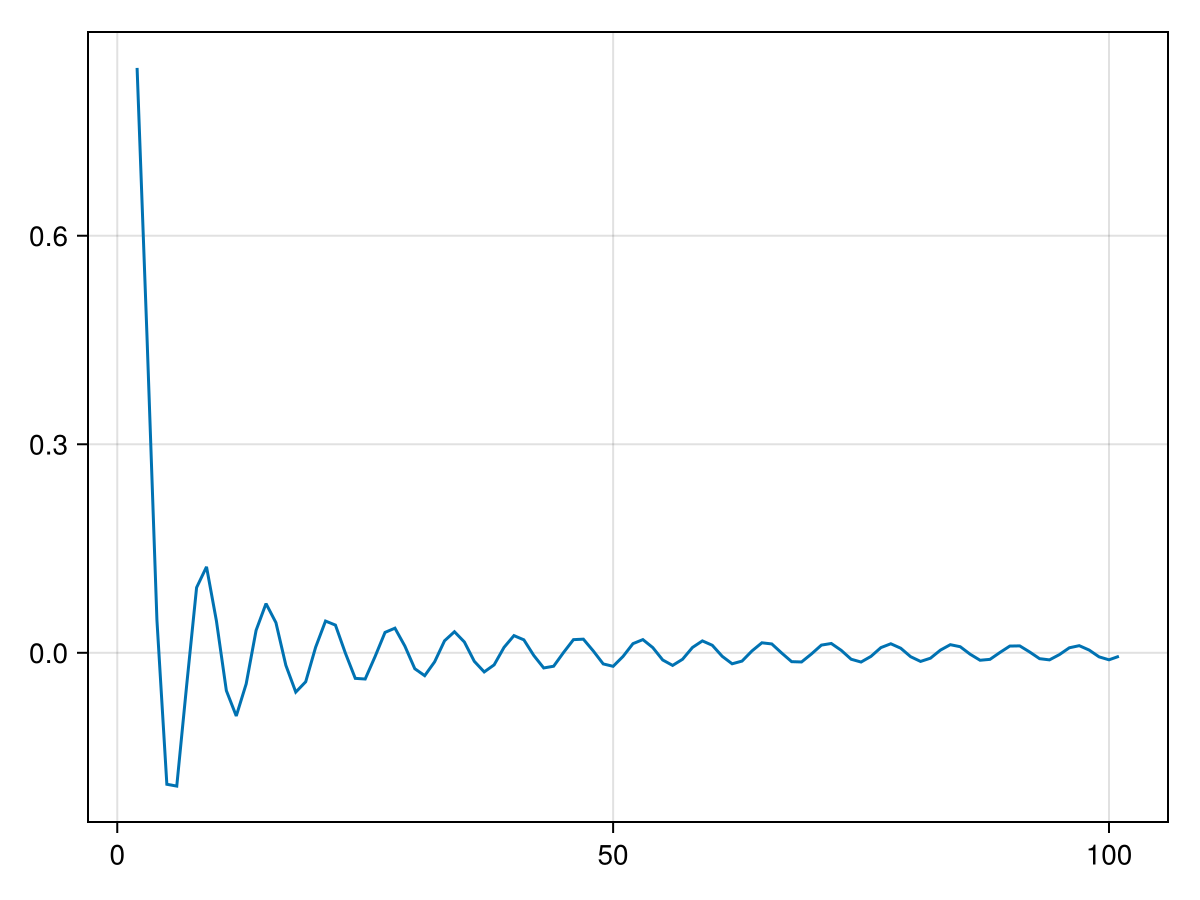

In [195]:
lines(map(x -> sin(x) / x, 0:100))

## Example 1: Determining Limits

In [196]:
expr = x // sqrt(x + 1 - 1);
lim(expr)

lim(x / sqrt(x))

**Numerical approach**

In [197]:
@syms x::Real
map(y -> limit(substitute(expr, (x => y)), x, 0), 1:5)

5-element Vector{Float64}:
 1.0
 1.414213562373095
 1.7320508075688774
 2.0
 2.23606797749979

**Algebraic approach**

In [198]:
expr = lim(expr) ~ lim(expr * (sqrt(x + 1 + 1) // sqrt(x + 1 + 1))) ~ lim(x*(sqrt(x + 1 + 1)) // (x + 1) - 1) ~ lim(sqrt(x + 1)^x + 1) ~ 1 + 1 ~ 2

lim(x / sqrt(x)) ~ lim(x / sqrt(x)) ~ lim(-1 + (x*sqrt(2 + x)) / (1 + x)) ~ lim(1 + sqrt(1 + x)^x) ~ 2 ~ 2

In [199]:
substitute(expr, (x => 1))

lim(1.0) ~ lim(1.0) ~ lim(-0.1339745962155614) ~ lim(2.414213562373095) ~ 2 ~ 2

## Example 2: A Limit That Fails to Exist

In [200]:
expr = abs(x) // x

abs(x) / x

The limit does not exist as x -> 0.

In [201]:
map(y -> limit(substitute(expr, (x => y)), x, 0), 1:5)

5-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0

In [202]:
map(y -> limit(substitute(-expr, (x => y)), x, 0), 1:5)

5-element Vector{Float64}:
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0

## Example 3: Oscillating Behavior

In [203]:
expr = sin( 1 // x)
f ~ expr

f(x) ~ sin(1 / x)

In [204]:
lim(expr)

lim(sin(1 / x))

**Numerical**

In [205]:
data = map(y -> limit(substitute(expr, (x => y)), x, 0), 1:10)

10-element Vector{Float64}:
 0.8414709848078965
 0.479425538604203
 0.3271946967961522
 0.24740395925452294
 0.19866933079506122
 0.16589613269341502
 0.14237172979226365
 0.12467473338522769
 0.11088262850995298
 0.09983341664682815

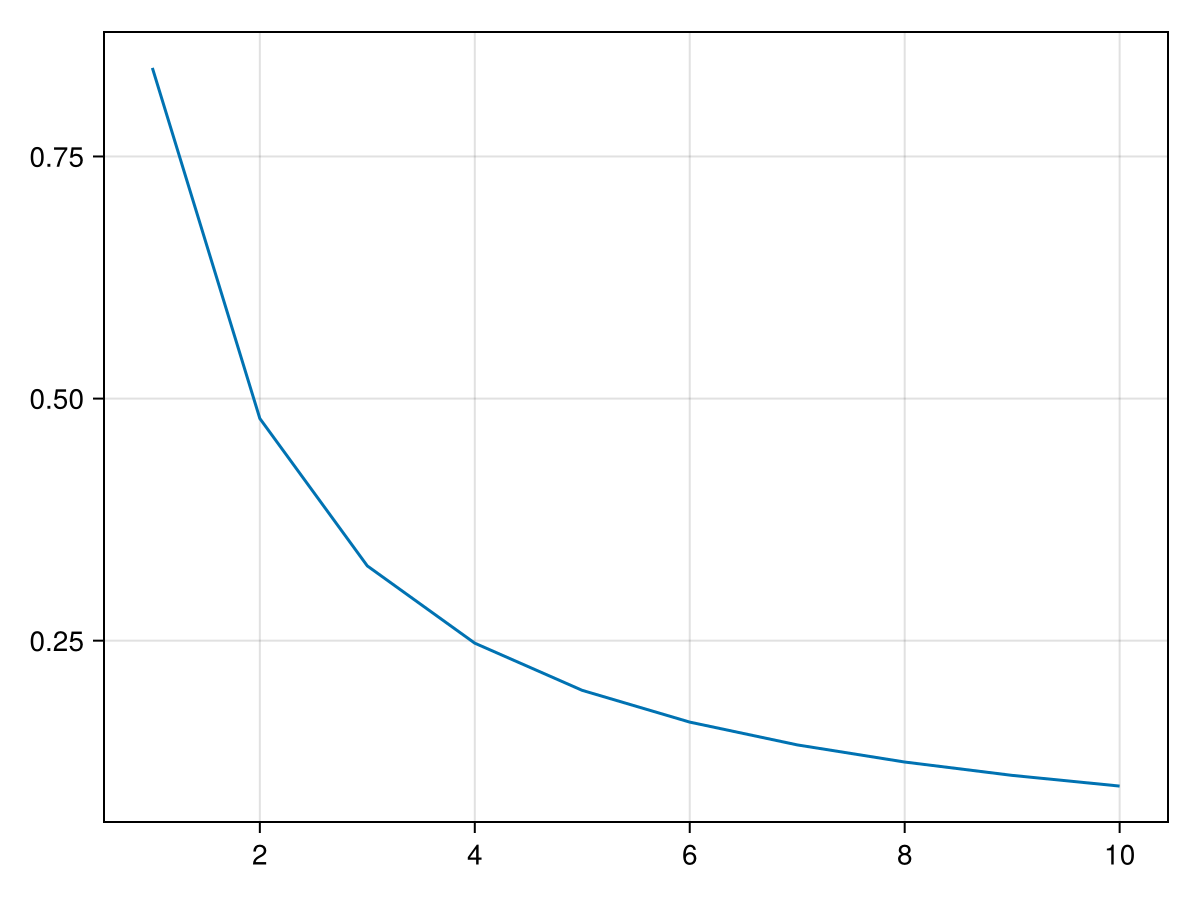

In [206]:
lines(data)

**Algebraic**

In [207]:
map(x ->  2 / x*π ~ data[x], 1:10)

10-element Vector{Equation}:
 6.283185307179586 ~ 0.8414709848078965
 3.141592653589793 ~ 0.479425538604203
 2.0943951023931953 ~ 0.3271946967961522
 1.5707963267948966 ~ 0.24740395925452294
 1.2566370614359172 ~ 0.19866933079506122
 1.0471975511965976 ~ 0.16589613269341502
 0.8975979010256552 ~ 0.14237172979226365
 0.7853981633974483 ~ 0.12467473338522769
 0.6981317007977318 ~ 0.11088262850995298
 0.6283185307179586 ~ 0.09983341664682815

**Graph**

In [208]:
data_2 = Iterators.flatmap(x ->  [2 / x*π, data[x]], 1:10) |> collect;

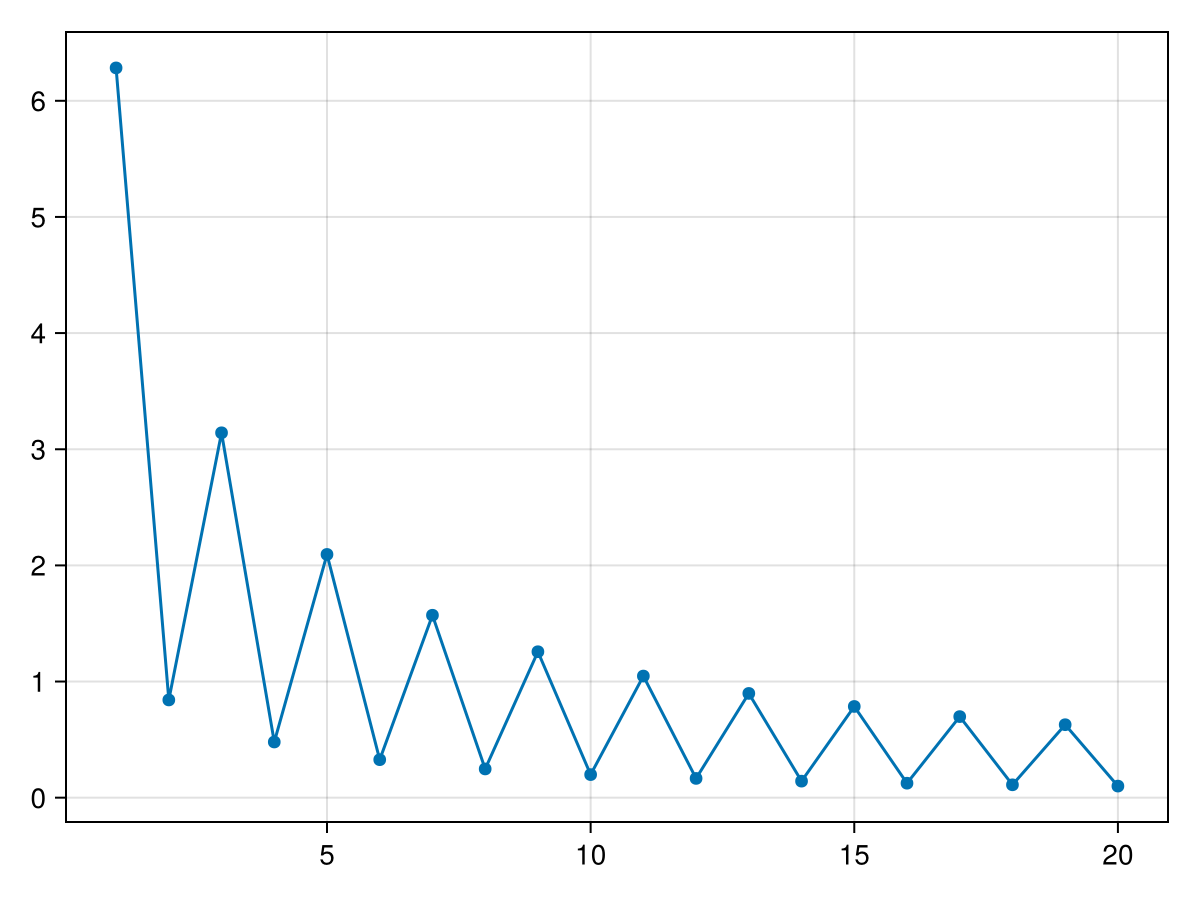

In [209]:
lines(data_2)
scatter!(data_2)
current_figure()